## Loading Data from local file

Testing basic models with newly added language-related features.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./XYmat_lang.csv')

In [3]:
df.head(5)

,name,reviews,FPS,Gore,Action,Demons,Shooter,First-Person,Great Soundtrack,Multiplayer,...,Finnish,Norwegian,Swedish,Greek,Bulgarian,Romanian,Unnamed: 411,Vietnamese,Slovakian,number of languages
0,PLAYERUNKNOWN'S BATTLEGROUNDS,92,1,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,17
1,BATTLETECH,49,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,4
2,DayZ,71,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,9
3,EVE Online,61,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
4,Grand Theft Auto V: Premium Online Edition,74,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12


In [4]:
df.columns

Index(['name', 'reviews', 'FPS', 'Gore', 'Action', 'Demons', 'Shooter',
       'First-Person', 'Great Soundtrack', 'Multiplayer',
       ...
       'Finnish', 'Norwegian', 'Swedish', 'Greek', 'Bulgarian', 'Romanian',
       'Unnamed: 411', 'Vietnamese', 'Slovakian', 'number of languages'],
      dtype='object', length=415)

In [5]:
df.index

RangeIndex(start=0, stop=11766, step=1)

In [6]:
df.values

array([["PLAYERUNKNOWN'S BATTLEGROUNDS", 92, 1, ..., 0, 0, 17],
       ['BATTLETECH', 49, 0, ..., 0, 0, 4],
       ['DayZ', 71, 1, ..., 0, 0, 9],
       ...,
       ['Chicken Farm 2K17 - Premium', 99, 0, ..., 0, 0, 1],
       ['TANE DLC - ZecRail 2017 Christmas Train', 96, 0, ..., 0, 0, 4],
       ['TANE DLC - EMD GP50 - Burlington Northern (Phase I)', 100, 0,
        ..., 0, 0, 1]], dtype=object)

In [7]:
y = df['reviews'].values
array = df.to_numpy()
X = array[:, 2:]
print(X)

[[1 0 1 ... 0 0 17]
 [0 0 1 ... 0 0 4]
 [1 0 1 ... 0 0 9]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 1 ... 0 0 4]
 [0 0 1 ... 0 0 1]]


## Split train test data

In [14]:
num_train = len(df) // 10 * 7

Xtrain = X[:num_train]
Xtest = X[num_train:]
ytrain = y[:num_train]
ytest = y[num_train:]
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(8232, 413) (3534, 413) (8232,) (3534,)


## Test data with multiple linear regression

In [15]:
import scipy as sp
import scipy.sparse.linalg
import math

In [16]:
out = sp.sparse.linalg.lsqr(Xtrain,ytrain)
beta = out[0]
print(beta.shape)

(413,)


## Compute Baseline

In [17]:
yBaseline = np.ones(len(ytest)) * np.mean(ytrain)
errs = np.array(abs(ytest - yBaseline))
loss = np.sum(errs)
avgL = loss/len(ytest)
print("multiple variable loss="+"{:.5e}".format(avgL))

multiple variable loss=2.33484e+01


In [18]:
## Compute loss with linear regression

In [19]:
yp = Xtest@beta
errs = np.array(abs(ytest - yp))
loss = np.sum(errs)
avgL = np.mean(errs)

print("multiple variable loss="+"{:.5e}".format(avgL))
arr = []

for i in range(len(ytest)):
    arr.append(abs(yp[i]-ytest[i]))
arr.sort(reverse = True)
for i in range(50):
    print(arr[i])

multiple variable loss=2.35577e+01
83.62901253448273
82.51957926932329
82.20672273692941
78.77474326442541
77.65598416014087
77.62221472000093
77.27586257272856
77.12682895350224
77.09759014394845
75.31096363200604
75.1360392893342
75.1360392893342
74.73299745287298
72.93077204266501
72.80649744806892
72.72327036407098
72.51382456933325
72.1360392893342
71.91868982611507
71.08735643746851
70.97455811389906
70.80711384058276
70.69724468642602
70.65140738731046
70.47455664183205
69.40540121145618
68.58473905528416
68.5220791257849
68.30984971614151
68.2241125727916
68.13332120483432
67.99850193807077
67.85338552995242
67.77460471175058
67.73299745287298
67.65695679654635
67.34114816625181
67.17070928528432
67.10682953507552
67.06219112563451
66.84772726547412
66.63055407372721
66.52622886929683
66.15972774473934
66.1360392893342
66.05953302691391
65.85850238319239
65.73299745287298
65.73095071157701
65.67821285828016


In [20]:
import matplotlib.pyplot as plt



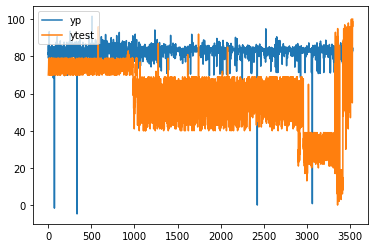

In [24]:
plt.plot(yp, label = "yp")
plt.plot(ytest, label = "ytest")
plt.legend(loc="upper left")
axes = plt.gca()
#axes.set_xlim([0,500])
#axes.set_ylim([60,100])
plt.show()

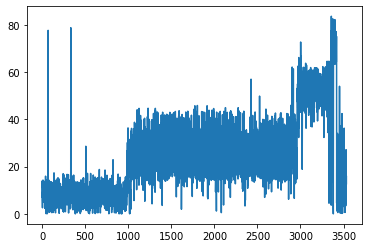

In [22]:
plt.plot(errs)

In [23]:
print(np.mean(errs))

23.557652058251374
